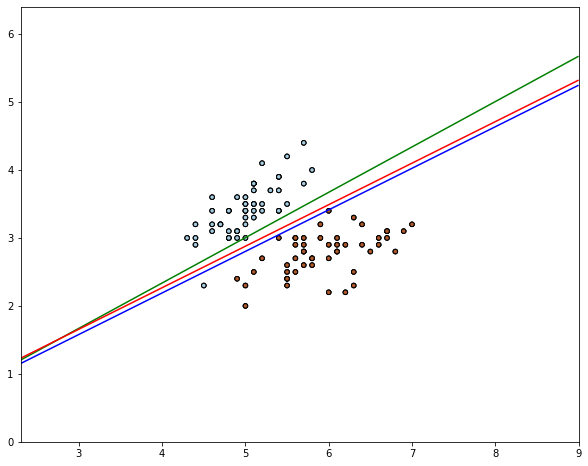

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn import datasets
iris = datasets.load_iris()
# we create 50 separable points
X = iris.data[:-50, :2]
Y = iris.target[:-50]
plt.subplots( figsize=(10, 8))

for  i, col in zip(
                        ["log", "hinge", "perceptron" ],
                        ['b', 'g','r']):
    clf = SGDClassifier(loss=i,max_iter=10000, tol=1e-5)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    xlim = (min(X[:,0])-2, max(X[:,0])+2)
    ylim = (min(X[:,1])-2, max(X[:,1])+2)

    xg = np.linspace(xlim[0], xlim[1], 60)
    yg = np.linspace(ylim[0], ylim[1], 40)
    X1, X2 = np.meshgrid(xg, yg)

    objects = np.c_[X1.ravel(),X2.ravel()]   
    Z = np.array([clf.decision_function([obj]) for obj in objects])
    Z = Z.reshape(X1.shape)   

    colors = col

    plt.contour(X1, X2, Z, [0], colors=colors )
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
                edgecolor='black', s=20)
    

plt.show()
